In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# Cleaning Data

In [4]:
# drop cabin
df.drop(columns='Cabin',inplace=True)

In [5]:
# fill age
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))

In [6]:
# hilangin nan di embarked
df.dropna(inplace=True)

In [7]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

# Feature Engineering dan Split Data

> feature engineer untuk data kategorikal yang datanya bukan numerik

In [8]:
df_numeric = df.select_dtypes(exclude='object')

In [9]:
df_non_numeric = df.select_dtypes(include='object')

In [10]:
x = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True).drop(
    ['Name','Ticket','PassengerId','Survived'],axis=1)
y = df['Survived']

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Pclass        889 non-null int64
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Sex_male      889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.3 KB


# Modelling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [13]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
307,1,17.00,1,0,108.9000,0,0,0
229,3,30.00,3,1,25.4667,0,0,1
82,3,30.00,0,0,7.7875,0,1,0
353,3,25.00,1,0,17.8000,1,0,1
707,1,42.00,0,0,26.2875,1,0,1
727,3,30.00,0,0,7.7375,0,1,0
314,2,43.00,1,1,26.2500,1,0,1
289,3,22.00,0,0,7.7500,0,1,0
608,2,22.00,1,2,41.5792,0,0,0
117,2,29.00,1,0,21.0000,1,0,1


In [14]:
model_1 = LogisticRegression()

In [15]:
model_1.fit(X_train,y_train)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate

In [16]:
X_test.head(1)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
511,3,30.0,0,0,8.05,1,0,1


In [17]:
model_1.predict([[3,30.0,0,0,8.05,1,0,1]])

array([0])

In [18]:
y_test.head(1)

511    0
Name: Survived, dtype: int64

In [19]:
prediction = model_1.predict(X_test)

In [20]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

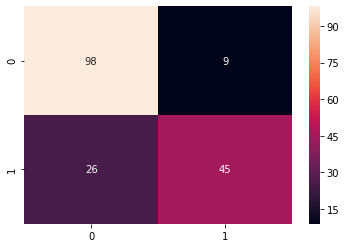

In [21]:
sns.heatmap(confusion_matrix(y_test,prediction),annot = True)

In [22]:
accuracy_score(y_test,prediction)

0.8033707865168539

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       107
           1       0.83      0.63      0.72        71

    accuracy                           0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178

